# Exploring the Legacy of Lexington Kentucky's Redlined Neighborhoods (Amenities)

Notebook Authored By: RC Ramsey
Date: 9 September 2021

## Table of Contents
- [Data](#data)
    - [Historical Redlined neighborhoods of Lexington KY Metadata](#histhoods)
    -[Lexington Parks Data](#lexparks)
- [Exploring Data](#exploredata)
    - [Examine the dataframes](#examine)
    - [Map Preview](#mappreview)
-[Buffers & Clipping](#buffclipparks)
    - [Buffers & Clipping HOLC Graded Parks](#bufferclip)
    - [Plot All HOLC Grades & Park Buffers](#plothoodsbuffers)    
    - [Plot HOLC by Grades & Parks (within 1 mile)](#plothoods1mileparks)
        - [Write to File](#writetofile)
    - [Plot all HOLC Grades & Intersected Parks](#plothoodsparksintersect)


<a id='data'></a>
## Data

<a id='histhoods'></a>
### Historical Redlined neighborhoods of Lexington KY Metadata

**Data Found**: [DSL Richmond edu Website: Mapping Inequality Redlining in New Deal America](https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58) and accessed 7 September 2021  

**Data Download**:
[here](https://dsl.richmond.edu/panorama/redlining/#loc=13/38.041/-84.555&maps=0&city=lexington-ky&text=downloads)  

**API Documentation/Abbreviations/Background**: [Downloads & Data](https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58&text=downloads)  and [About](https://dsl.richmond.edu/panorama/redlining/#loc=5/39.113/-94.57&text=about)

The initial GeoJSON hosted on the Richmond Edu website was created from a scanned Residential Security map prepared by Division of Research and Statistics with the Co-operation of the Appraisal Department Home Owners' Loan Corporation April 12 1930. The original map was of *City of Lexington and Additions in Fayette County KY by P.A. Rowe and Co Inc Engineers Lexington KY* that was a revised addition of the author's original map corrected to Jan 1 1932, revised by W.E. Rowe.

The scan was then georectified with current map points in lexington ky and the  Shapefile/GeoJSON made available for the public.

The geoJSON provided was downloaded and accessed locally. 

Thousands of area descriptions were created by the federal government's Home Owners' Loan Corporation between 1935-1940. Area descriptions were created by HOLC staff using data dn evaulations organized by local real estate professionals (lenders, developers, real estat appraisers). Each area was assigned a grade that was to correspond to it's relative *mortgage security* and be color coded. Those with the better grade (A) were determined ones who should receive loans and were *safe* investments. Those with the lower grades (D) were considered *hazardous*

1. A (green) minimal risk for bank/mortgage lenders  
2. B (blue)
3. C (yellow)
4. D (red) hazardous with greatest risk for bank/mortgage lenders

The grade of these neighborhoods and therefore the homes contained therein was determined by such informationas quality of housing, recent history of sale and rent values, and the **racial and ethnic identity and class of residents**.

*Arguably the HOLC agents in the other two hundred-plus cities graded through this program adopted a consistently white, elite standpoint or perspective. HOLC assumed and insisted that the residency of African Americans and immigrants, as well as working-class whites, compromised the values of homes and the security of mortgages. In this they followed the guidelines set forth by Frederick Babcock, the central figure in early twentieth-century real estate appraisal standards, in his Underwriting Manual: "The infiltration of inharmonious racial groups ... tend to lower the levels of land values and to lessen the desirability of residential areas.* (Nelson, Winling, Marciano, Connolly, et al. 2021)  

Language commonly found among the HOLC archives include:
"infiltration" of what was described as "subversive," "undesirable," "inharmonious," or "lower grade" populations.  

Examples include the following qoutes (each from a different city's description):  

*Colored infiltration a definitely adverse influence on neighborhood desirability although Negroes will buy properties at fair prices and usually rent rooms.*  

*Italian infiltration depress residential desirability in this area.*  
 
*Infiltration of Jewish into area have depressed values.*  
  
*...once a very substantial and desirable area" to the "gradual infiltration of negroes and Asiatics.*
 
*...could be classed as High Yellow [C], but for infiltration of Orientals and gradual infiltration of Negroes form south to north.*

*These grades were a tool for redlining: making it difficult or impossible for people in certain areas to access mortgage financing and thus become homeowners. Redlining directed both public and private capital to native-born white families and away from African American and immigrant families. As homeownership was arguably the most significant means of intergenerational wealth building in the United States in the twentieth century, these redlining practices from eight decades ago had long-term effects in creating wealth inequalities that we still see today.* (Nelson, Winling, Marciano, Connolly, et al. 2021)  

Area descriptions for Lexington have not been located and may not exist.

**Citation**:  
Robert K. Nelson, LaDale Winling, Richard Marciano, Nathan Connolly, et al., “Mapping Inequality,” American Panorama, ed. Robert K. Nelson and Edward L. Ayers, accessed September 7, 2021, https://dsl.richmond.edu/panorama/redlining/.
  
**Side Note**:
The URL for Mapping Inequality updates to reflect the current map view, which city or neighborhood or area description is selected, any text that is open, etc. You can use those URLs to link to or cite a particular state of the map.

**Data's License Agreement Type**:
Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License
Creative Commons License

<a id='lexparks'></a>
### Lexington Parks Data
Parks data collected using QGIS (3.16) Open Street Map Query plugin
QuickOSM plugin quick query (7 August 2021) with *Preset Land use and nature/Land use/Park*, *Key-leisure*, *Value-park*, *Layer Extent-a quick sketched by hand new circle road polygon layer*.

Layer was then exported locally in WGS 84 after removing all attributes with excess null values besides osmid, lesiure, & name


<a id='exploredata'></a>
## Exploring Data
Import libraries necessary to explore data. Alter default parameters as needed.

In [68]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups # can help speed up processes
import matplotlib.pyplot as plt
import timeit

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

Import data locally and examine amount of time to do so.

In [69]:
%%time
lex_redlined = gpd.read_file('./Data/KYLexington1936.geojson')


Wall time: 62.9 ms


In [70]:
%%time
new_circle_parks = gpd.read_file('./Data/osm_lex_newcircle_parks.geojson')

Wall time: 85.1 ms


In [71]:
print('Redlined Neighborhoods CRS=', lex_redlined.crs)
print('Public Parks CRS=', new_circle_parks.crs)

Redlined Neighborhoods CRS= epsg:4326
Public Parks CRS= epsg:4326


<a id='examine'></a>
### Examine the dataframes 
Glance at headers to see what attributes working with.

In [72]:
lex_redlined.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,{'': ''},"MULTIPOLYGON (((-84.51133 38.01811, -84.51211 ..."
1,None,A2,A,{'': ''},"MULTIPOLYGON (((-84.49628 38.02381, -84.49376 ..."
2,None,A3,A,{'': ''},"MULTIPOLYGON (((-84.47662 38.02922, -84.47708 ..."
3,None,A4,A,{'': ''},"MULTIPOLYGON (((-84.47662 38.02922, -84.47470 ..."
4,None,B1,B,{'': ''},"MULTIPOLYGON (((-84.51276 38.03197, -84.50941 ..."


In [73]:
new_circle_parks.head()

,osm_id,leisure,type,name,designation,geometry
0,12249602,park,multipolygon,Cardinal Run Park South,Cardinal Run Park South,"MULTIPOLYGON (((-84.56308 38.02962, -84.56407 ..."
1,12249603,park,multipolygon,Beaumont Preserve,None,"MULTIPOLYGON (((-84.56451 38.02967, -84.56577 ..."
2,23970958,park,None,University of Kentucky Arboretum,None,"MULTIPOLYGON (((-84.51141 38.01597, -84.51187 ..."
3,35566354,park,None,Shillito Park,None,"MULTIPOLYGON (((-84.52970 37.99256, -84.52964 ..."
4,43027109,park,None,Thoroughbred Park,None,"MULTIPOLYGON (((-84.49139 38.04151, -84.49114 ..."


Review data types, number of entries, and unique names per attribute of interest.

In [74]:
lex_redlined.info() #29 entries, all datatypes object excluding geometry

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   0 non-null      object  
 1   holc_id                29 non-null     object  
 2   holc_grade             29 non-null     object  
 3   area_description_data  29 non-null     object  
 4   geometry               29 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 1.3+ KB


In [75]:
print(lex_redlined['holc_grade'].unique(),
      lex_redlined['holc_id'].unique(),
      lex_redlined['name'].unique()
     )

['A' 'B' 'C' 'D'] ['A1' 'A2' 'A3' 'A4' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C10' 'C11' 'C12' 'C2'
 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7'
 'D8'] [None]


In [76]:
new_circle_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   osm_id       55 non-null     object  
 1   leisure      55 non-null     object  
 2   type         2 non-null      object  
 3   name         49 non-null     object  
 4   designation  21 non-null     object  
 5   geometry     55 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.7+ KB


In [77]:
new_circle_parks.nunique() #55 individual entries containing 49 names

osm_id         55
leisure         1
type            1
name           49
designation    21
geometry       55
dtype: int64

<a id='mappreview'></a>
### Map Preview
Preview the raw data map

Convert CRS to EPSG 2205 for NAD83/Kentucky North (meters) (selected because geopandas/shapely assumes their set of operations are being used in meters).

In [78]:
crs = {'init' :'epsg:2205'}
lex_redlined_geo = lex_redlined.to_crs(crs)
new_circle_parks_geo = new_circle_parks.to_crs(crs)

C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [79]:
print('Redlined Neighborhoods CRS=', lex_redlined_geo.crs)
print('Public Parks inside New Circle CRS=', new_circle_parks_geo.crs)

Redlined Neighborhoods CRS= +init=epsg:2205 +type=crs
Public Parks inside New Circle CRS= +init=epsg:2205 +type=crs


Plot intial dataframes to take a look:

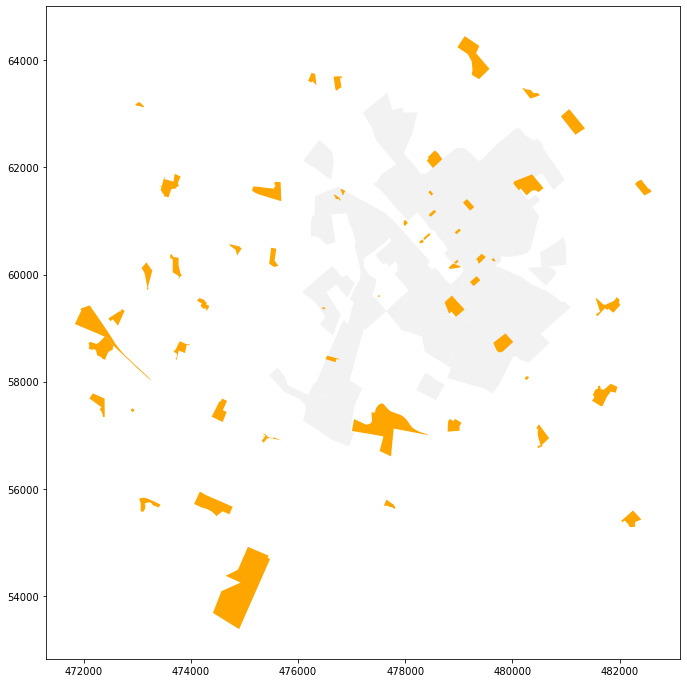

In [80]:
#plot all neighborhoods and parks
fig, ax = plt.subplots()

lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);
new_circle_parks_geo.plot(ax=ax, color='orange', zorder=1);


Confirm the unique values named using new CRS geo layer

In [81]:
print(lex_redlined_geo['holc_grade'].unique(),
      lex_redlined_geo['holc_id'].unique(),
      lex_redlined_geo['name'].unique()
     )

['A' 'B' 'C' 'D'] ['A1' 'A2' 'A3' 'A4' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C10' 'C11' 'C12' 'C2'
 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7'
 'D8'] [None]


In [82]:
#pull out individual holc graded areas by unique values
holca = lex_redlined_geo[lex_redlined_geo['holc_grade'] == 'A']
holcb = lex_redlined_geo[lex_redlined_geo['holc_grade'] == 'B']
holcc = lex_redlined_geo[lex_redlined_geo['holc_grade'] == 'C']
holcd = lex_redlined_geo[lex_redlined_geo['holc_grade'] == 'D']

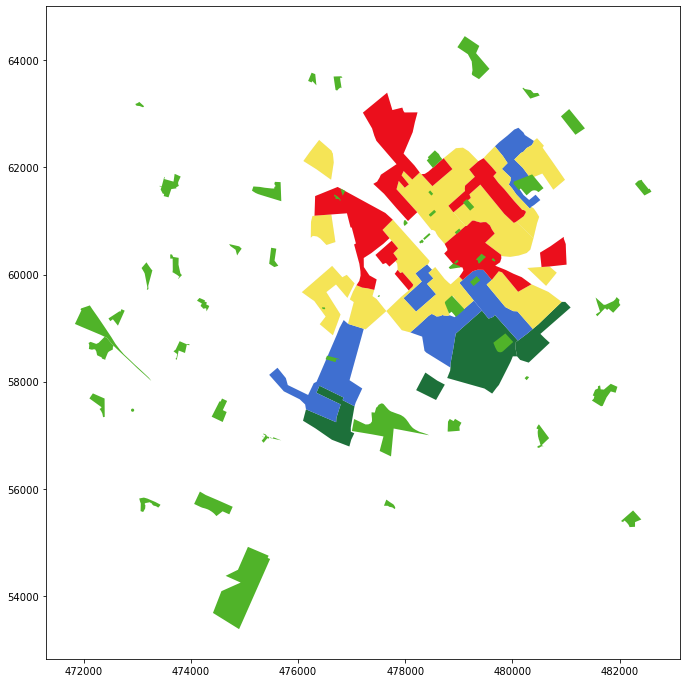

In [83]:
#plot all layers colorcoded
fig, ax = plt.subplots()

lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);
new_circle_parks_geo.plot(ax=ax, color='#50b329', zorder=1);
holca.plot(ax=ax, color ='#1d703a', zorder=0);
holcb.plot(ax=ax, color ='#3f6fd0', zorder=0);
holcc.plot(ax=ax, color ='#f5e456', zorder=0);
holcd.plot(ax=ax, color ='#eb0f1c', zorder=0);

<a id='buffclipparks'></a>
## Buffers & Clipping 

<a id='bufferclip'></a>
### Buffers & Clipping HOLC Graded Parks

Check to see what 'types' of polygons working with.

In [84]:
print(holca.geom_type.unique(),
      holcb.geom_type.unique(),
      holcc.geom_type.unique(),
      holcd.geom_type.unique()
     )
#all report as being single 'multipolygon' type object for each layer


['MultiPolygon'] ['MultiPolygon'] ['MultiPolygon'] ['MultiPolygon']


Create single polygon per holc grade to clip park buffers (Shapely's .unary_union method)

In [85]:
holca_polygon = holca.geometry.unary_union
holcb_polygon = holcb.geometry.unary_union
holcc_polygon = holcc.geometry.unary_union
holcd_polygon = holcd.geometry.unary_union

Create buffer around each park indicating reasonable walking distance (0.5 mile aka 805 meters).
Create a new column and assign it the result of the park buffer.


In [86]:
new_circle_parks_geo['buffer'] = new_circle_parks_geo.buffer(805)
new_circle_parks_geo['buffer'].head()
#output GeoDataFrame are polygon features, coordinates of meters

0    POLYGON ((471153.201 59524.519, 471155.388 595...
1    POLYGON ((471287.982 58630.374, 471284.331 586...
2    POLYGON ((476892.708 58092.996, 476931.796 581...
3    POLYGON ((473845.287 54443.212, 473848.273 544...
4    POLYGON ((478210.607 59596.689, 478160.549 596...
Name: buffer, dtype: geometry

Check what is being used for geometry.

In [87]:
print(new_circle_parks_geo.geometry.name) #output geometry column

geometry


Swap to the geometry used to the buffer column

In [88]:
new_circle_parks_buffer = new_circle_parks_geo.set_geometry('buffer')
print(new_circle_parks_buffer.geometry.name) #buffer column

buffer


<a id='plothoodsbuffers'></a>
### Plot All HOLC Grades & Park Buffers

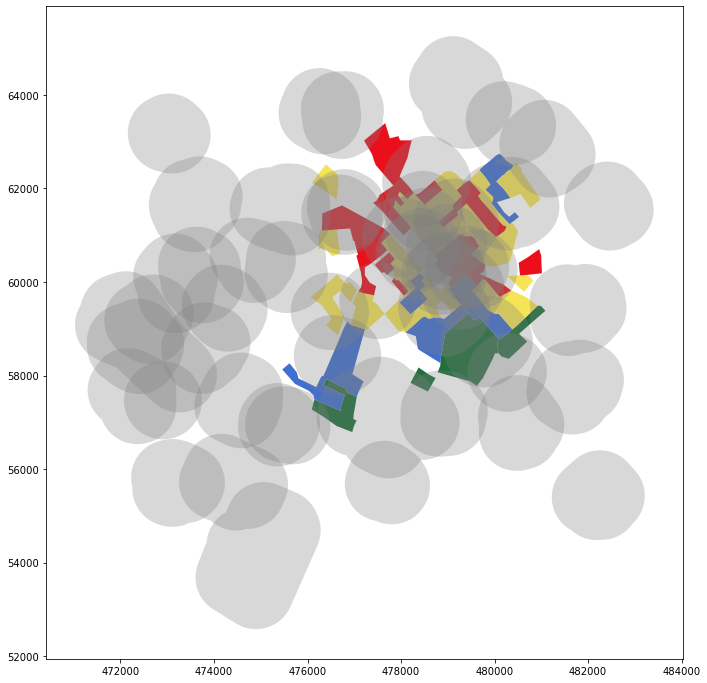

In [89]:
#plot graded neighborhoods and buffers of all parks
fig, ax = plt.subplots() 

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);

#use holc graded layers that have not been turned into single polygon layer
new_circle_parks_buffer.plot(ax=ax, color='grey', zorder=1, alpha=0.3);
holca.plot(ax=ax, color ='#1d703a', zorder=0);
holcb.plot(ax=ax, color ='#3f6fd0', zorder=0);
holcc.plot(ax=ax, color ='#f5e456', zorder=0);
holcd.plot(ax=ax, color ='#eb0f1c', zorder=0);

Clip park buffer layer to each holc grade polygon layer using .intersect() method

In [90]:
#using polygon layer for each park created for clipping.
holca_parks = new_circle_parks_buffer[new_circle_parks_buffer.geometry.intersects(holca_polygon)]
holcb_parks = new_circle_parks_buffer[new_circle_parks_buffer.geometry.intersects(holcb_polygon)]
holcc_parks = new_circle_parks_buffer[new_circle_parks_buffer.geometry.intersects(holcc_polygon)]
holcd_parks = new_circle_parks_buffer[new_circle_parks_buffer.geometry.intersects(holcd_polygon)]



Plot HOLC A neighborhoods and 1/2 mile park buffers intersect with

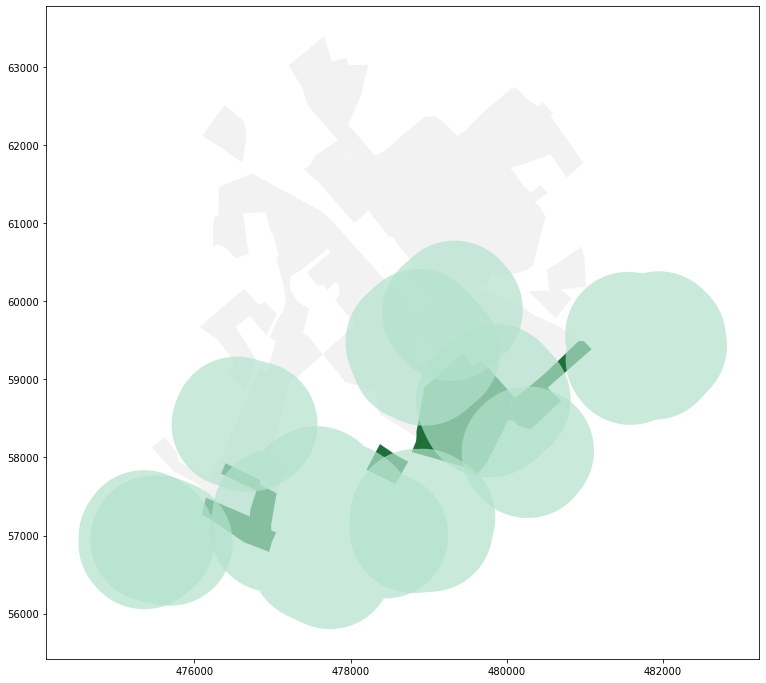

In [91]:
#plot HOLCA and intersected buffers
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holca_parks.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holca.plot(ax=ax, color ='#1d703a', zorder=0);


Plot HOLC B neighborhoods and 1/2 mile park buffers intersect with

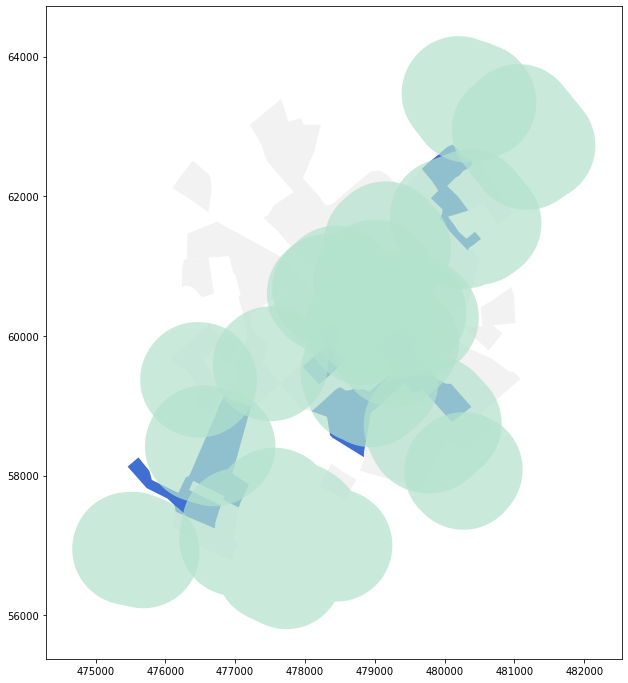

In [92]:
#plot HOLC B and intersected buffers
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);
#new_circle_parks_geo.plot(ax=ax, color='#50b329', zorder=1);


holcb_parks.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcb.plot(ax=ax, color ='#3f6fd0', zorder=0);


Plot HOLC C neighborhoods and 1/2 mile park buffers intersect with

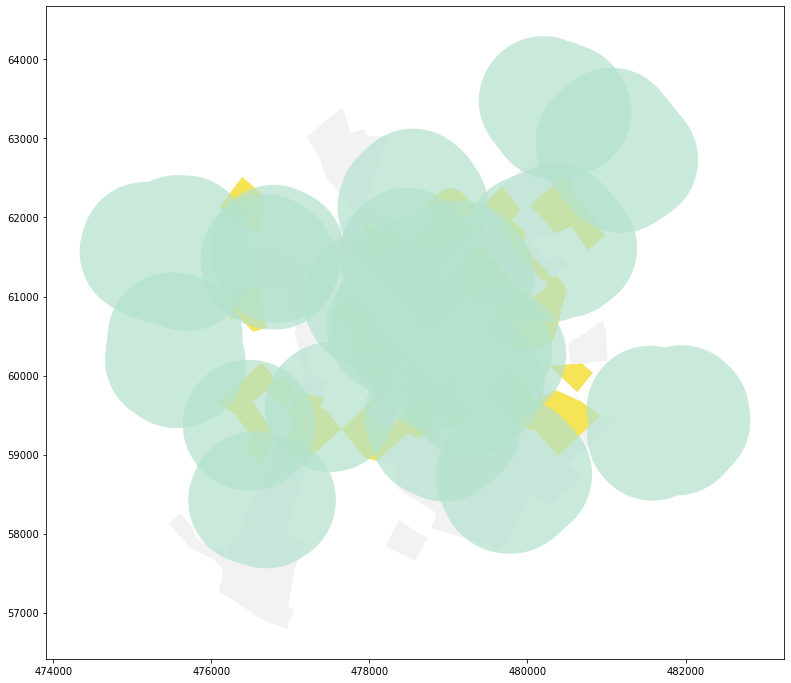

In [93]:
#plot HOLC C and intersecting buffers
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);
#new_circle_parks_geo.plot(ax=ax, color='#50b329', zorder=1);


holcc_parks.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcc.plot(ax=ax, color ='#f5e456', zorder=0);


Plot HOLC D neighborhoods and 1/2 mile park buffers intersect with

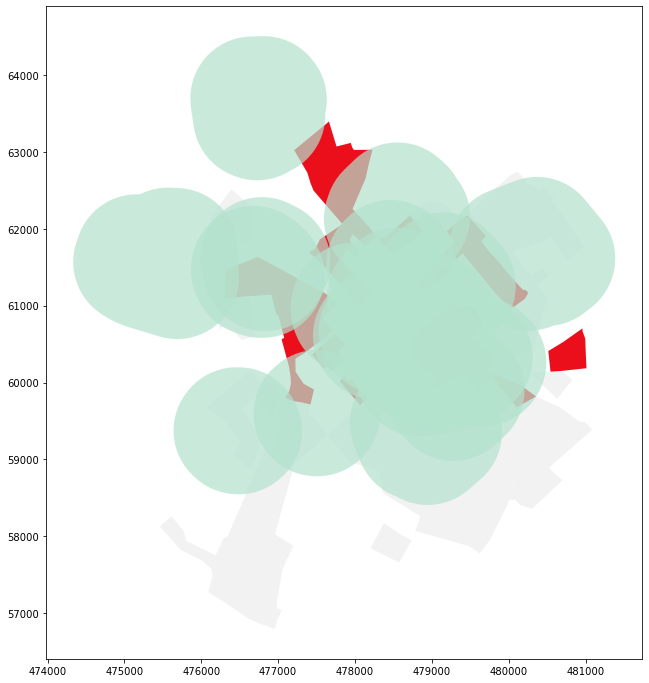

In [94]:
#plot HOLC D and intersecting buffers
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);
#new_circle_parks_geo.plot(ax=ax, color='#50b329', zorder=1);


holcd_parks.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcd.plot(ax=ax, color ='#eb0f1c', zorder=0);


<a id='plothoods1mileparks'></a>
### Plot HOLC by Grades & Parks (within 1/2 mile)

In [95]:
#using new circle parks geo layer of all parks, clip by each graded HOLC neighborhood
holca_parks_outline_buf_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holca_parks)]
holcb_parks_outline_buf_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holcb_parks)]
holcc_parks_outline_buf_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holcc_parks)]
holcd_parks_outline_buf_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holcd_parks)]


C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


Calculate square meters of area of parks using geopandas. Multiply by converter for obtainig acreage, create column, add calculated data to column.

In [96]:
#calculate square meters of area of parks through geopandas, multiply by converter for obtaining acres, create column, add to column
holca_parks_outline_buf_int['acres'] = holca_parks_outline_buf_int.geometry.area*0.000247105
holcb_parks_outline_buf_int['acres'] = holca_parks_outline_buf_int.geometry.area*0.000247105
holcc_parks_outline_buf_int['acres'] = holca_parks_outline_buf_int.geometry.area*0.000247105
holcd_parks_outline_buf_int['acres'] = holca_parks_outline_buf_int.geometry.area*0.000247105

C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Confirm area calculated and added to geodataframe.

In [97]:
holcb_parks_outline_buf_int.head(20)

,osm_id,leisure,type,name,designation,geometry,buffer,acres
2,23970958,park,None,University of Kentucky Arboretum,None,"MULTIPOLYGON (((477044.519 57303.384, 477003.8...","POLYGON ((476892.708 58092.996, 476931.796 581...",107.672852
4,43027109,park,None,Thoroughbred Park,None,"MULTIPOLYGON (((478810.597 60133.380, 478831.8...","POLYGON ((478210.607 59596.689, 478160.549 596...",NaN
5,52813760,park,None,Castlewood Park,None,"MULTIPOLYGON (((480487.364 61539.588, 480581.7...","POLYGON ((479752.179 60859.433, 479742.125 608...",NaN
6,143784727,park,None,Woodland Park,Woodland Park,"MULTIPOLYGON (((479107.191 59349.351, 478870.3...","POLYGON ((478541.635 58516.687, 478496.139 585...",18.893346
7,143784730,park,None,Bell Park,Bell Place,"MULTIPOLYGON (((479208.608 59862.503, 479333.3...","POLYGON ((478605.325 59329.517, 478555.866 593...",4.192970
10,144113285,park,None,None,Clinton Road Park,"MULTIPOLYGON (((480268.149 58104.796, 480228.0...","POLYGON ((480577.897 58847.817, 480622.597 588...",0.796642
14,144480497,park,None,None,Hill n' Dale Park,"MULTIPOLYGON (((475470.610 56950.800, 475473.9...","POLYGON ((475300.695 56163.937, 475223.228 561...",0.627288
24,145221558,park,None,Elizabeth Park,Elizabeth Street Park,"MULTIPOLYGON (((476771.264 58424.105, 476539.4...","POLYGON ((477175.523 57718.809, 477133.948 576...",3.635906
28,158973829,park,None,Duncan Park,None,"MULTIPOLYGON (((479210.561 61193.333, 479287.7...","POLYGON ((478606.988 60660.676, 478550.663 607...",NaN
29,159767234,park,None,Constitution Park,None,"MULTIPOLYGON (((480906.524 62954.235, 481060.4...","POLYGON ((480273.776 62456.585, 480226.832 625...",NaN


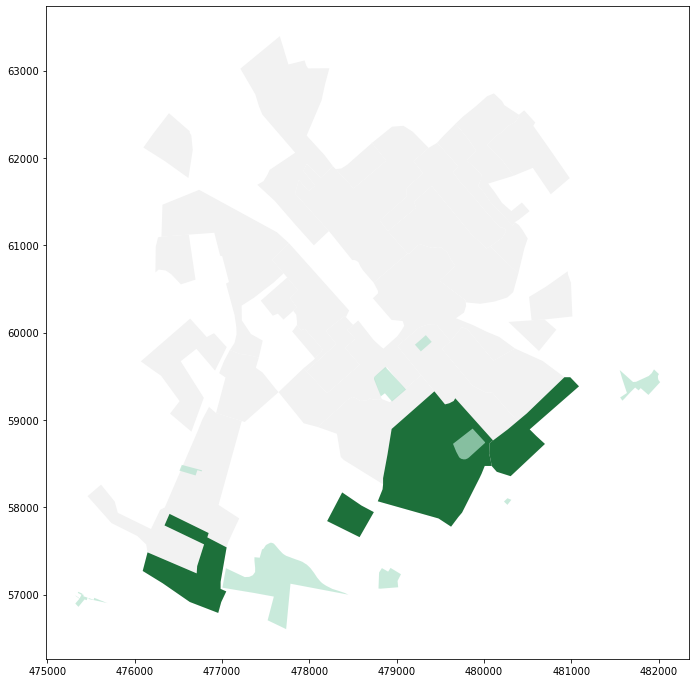

In [98]:
#plot parks (no buffers) in HOLC A 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holca_parks_outline_buf_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holca.plot(ax=ax, color ='#1d703a', zorder=0);


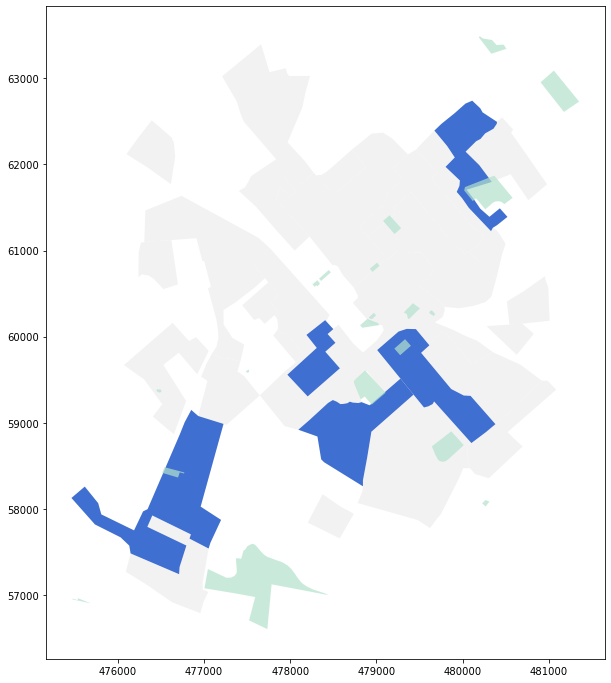

In [99]:
#plot parks (no buffers) in HOLC B 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holcb_parks_outline_buf_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcb.plot(ax=ax, color ='#3f6fd0', zorder=0);

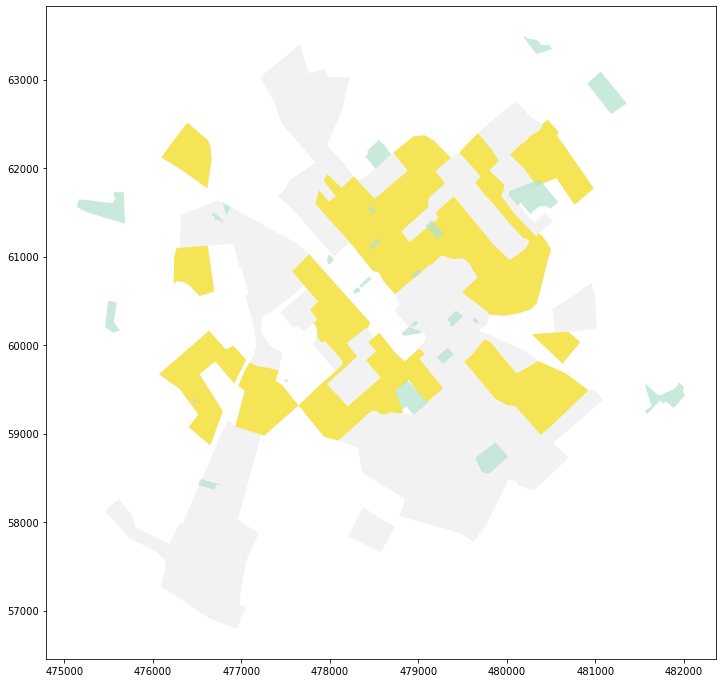

In [100]:
#plot parks (no buffers) in HOLC C 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holcc_parks_outline_buf_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcc.plot(ax=ax, color ='#f5e456', zorder=0);

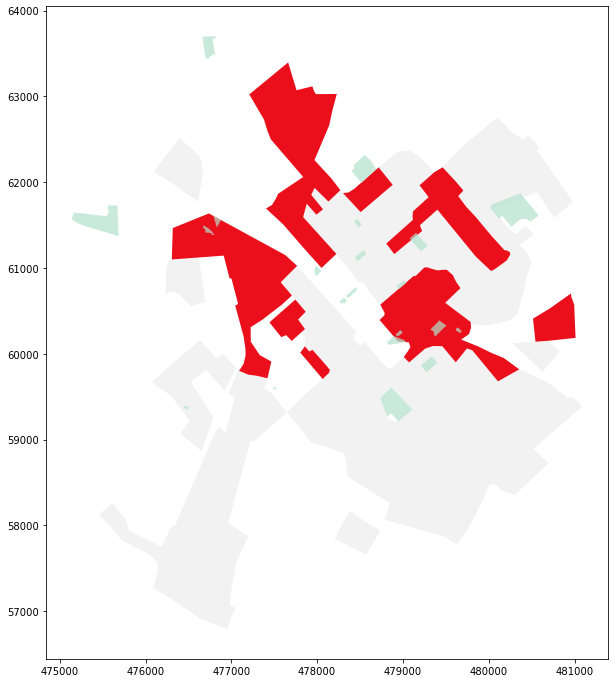

In [101]:
#plot parks (no buffers) in HOLC D 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holcd_parks_outline_buf_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcd.plot(ax=ax, color ='#eb0f1c', zorder=0);

<a id='writetofile'></a>
#### Write to File
Write to file as individual layers, each graded neighborhoods parks that are within 1/2 mile (805 meters) of the neighborhood.

Review Headers pulled to new geodf.

In [102]:
holca_parks_outline_buf_int.head()

,osm_id,leisure,type,name,designation,geometry,buffer,acres
2,23970958,park,None,University of Kentucky Arboretum,None,"MULTIPOLYGON (((477044.519 57303.384, 477003.8...","POLYGON ((476892.708 58092.996, 476931.796 581...",107.672852
6,143784727,park,None,Woodland Park,Woodland Park,"MULTIPOLYGON (((479107.191 59349.351, 478870.3...","POLYGON ((478541.635 58516.687, 478496.139 585...",18.893346
7,143784730,park,None,Bell Park,Bell Place,"MULTIPOLYGON (((479208.608 59862.503, 479333.3...","POLYGON ((478605.325 59329.517, 478555.866 593...",4.192970
8,143881632,park,None,Ecton Park,Ecton Park,"MULTIPOLYGON (((479048.780 57234.291, 479009.9...","POLYGON ((478862.084 58107.897, 478902.298 581...",11.528235
10,144113285,park,None,None,Clinton Road Park,"MULTIPOLYGON (((480268.149 58104.796, 480228.0...","POLYGON ((480577.897 58847.817, 480622.597 588...",0.796642


Review what is the current CRS of the geodf

In [103]:
holca_parks_outline_buf_int.crs #EPSG 2205

<Projected CRS: EPSG:2205>
Name: NAD83 / Kentucky North
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Kentucky - counties of Anderson; Bath; Boone; Bourbon; Boyd; Bracken; Bullitt; Campbell; Carroll; Carter; Clark; Elliott; Fayette; Fleming; Franklin; Gallatin; Grant; Greenup; Harrison; Henry; Jefferson; Jessamine; Kenton; Lawrence; Lewis; Mason; Menifee; Montgomery; Morgan; Nicholas; Oldham; Owen; Pendleton; Robertson; Rowan; Scott; Shelby; Spencer; Trimble; Woodford.
- bounds: (-85.96, 37.71, -82.47, 39.15)
Coordinate Operation:
- name: SPCS83 Kentucky North zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Convert CRS back to WGS 84 prior to writing to file so can import to mapping program

In [104]:
crs = {'init' :'epsg:4326'} 
holca_parks_int_4326 = holca_parks_outline_buf_int.to_crs(crs)
holcb_parks_int_4326 = holcb_parks_outline_buf_int.to_crs(crs)
holcc_parks_int_4326 = holcc_parks_outline_buf_int.to_crs(crs)
holcd_parks_int_4326 = holcd_parks_outline_buf_int.to_crs(crs)

C:\Users\jbra2\.conda\envs\674_06\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Confirm CRS change 

In [105]:
holca_parks_int_4326.crs #output epsg 4326

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Confirm geometry now contains lat/long for mapping online

In [106]:
holca_parks_int_4326.head()

,osm_id,leisure,type,name,designation,geometry,buffer,acres
2,23970958,park,None,University of Kentucky Arboretum,None,"MULTIPOLYGON (((-84.51141 38.01597, -84.51187 ...","POLYGON ((476892.708 58092.996, 476931.796 581...",107.672852
6,143784727,park,None,Woodland Park,Woodland Park,"MULTIPOLYGON (((-84.48798 38.03445, -84.49069 ...","POLYGON ((478541.635 58516.687, 478496.139 585...",18.893346
7,143784730,park,None,Bell Park,Bell Place,"MULTIPOLYGON (((-84.48684 38.03908, -84.48543 ...","POLYGON ((478605.325 59329.517, 478555.866 593...",4.192970
8,143881632,park,None,Ecton Park,Ecton Park,"MULTIPOLYGON (((-84.48859 38.01539, -84.48903 ...","POLYGON ((478862.084 58107.897, 478902.298 581...",11.528235
10,144113285,park,None,None,Clinton Road Park,"MULTIPOLYGON (((-84.47472 38.02326, -84.47518 ...","POLYGON ((480577.897 58847.817, 480622.597 588...",0.796642


Review what attribute is being used for setting geometry

In [107]:
print(holca_parks_int_4326.geometry.name) #output geometry currently referencing the geometry column, which is what we want

geometry


Drop buffer attribute prior to writing to json (otherwise will receive error)

In [108]:
holca_parks_int_4326_dropped = holca_parks_int_4326.drop(columns=['buffer'])
holcb_parks_int_4326_dropped = holcb_parks_int_4326.drop(columns=['buffer'])
holcc_parks_int_4326_dropped = holcc_parks_int_4326.drop(columns=['buffer'])
holcd_parks_int_4326_dropped = holcd_parks_int_4326.drop(columns=['buffer'])

In [109]:
holca_parks_int_4326_dropped.head() #confirmed buffer attribute dropped

,osm_id,leisure,type,name,designation,geometry,acres
2,23970958,park,None,University of Kentucky Arboretum,None,"MULTIPOLYGON (((-84.51141 38.01597, -84.51187 ...",107.672852
6,143784727,park,None,Woodland Park,Woodland Park,"MULTIPOLYGON (((-84.48798 38.03445, -84.49069 ...",18.893346
7,143784730,park,None,Bell Park,Bell Place,"MULTIPOLYGON (((-84.48684 38.03908, -84.48543 ...",4.192970
8,143881632,park,None,Ecton Park,Ecton Park,"MULTIPOLYGON (((-84.48859 38.01539, -84.48903 ...",11.528235
10,144113285,park,None,None,Clinton Road Park,"MULTIPOLYGON (((-84.47472 38.02326, -84.47518 ...",0.796642


In [120]:
holca_parks_int_4326_dropped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10 entries, 2 to 51
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   osm_id       10 non-null     object  
 1   leisure      10 non-null     object  
 2   type         0 non-null      object  
 3   name         8 non-null      object  
 4   designation  7 non-null      object  
 5   geometry     10 non-null     geometry
 6   acres        10 non-null     float64 
dtypes: float64(1), geometry(1), object(5)
memory usage: 940.0+ bytes


In [110]:
with open('../map/data/holca_parks_int_4326.json', 'w') as f:
    f.write(holca_parks_int_4326_dropped.to_json())

In [111]:
with open('../map/data/holcb_parks_int_4326.json', 'w') as f:
    f.write(holcb_parks_int_4326_dropped.to_json())

In [112]:
with open('../map/data/holcc_parks_int_4326.json', 'w') as f:
    f.write(holcc_parks_int_4326_dropped.to_json())

In [113]:
with open('../map/data/holcd_parks_int_4326.json', 'w') as f:
    f.write(holcd_parks_int_4326_dropped.to_json())

<a id='plothoodsparksintersect'></a>
### Plot All HOLC Grades & Intersected Parks

Find what parks are directly intersected by a neighborhood (i.e. actually exist within the holc graded neighborhoods excluding buffer)

In [114]:
#using new circle parks geo layer of all parks, clip by each graded HOLC neighborhood
holca_parks_hood_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holca_polygon)]
holcb_parks_hood_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holcb_polygon)]
holcc_parks_hood_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holcc_polygon)]
holcd_parks_hood_int = new_circle_parks_geo[new_circle_parks_geo.geometry.intersects(holcd_polygon)]

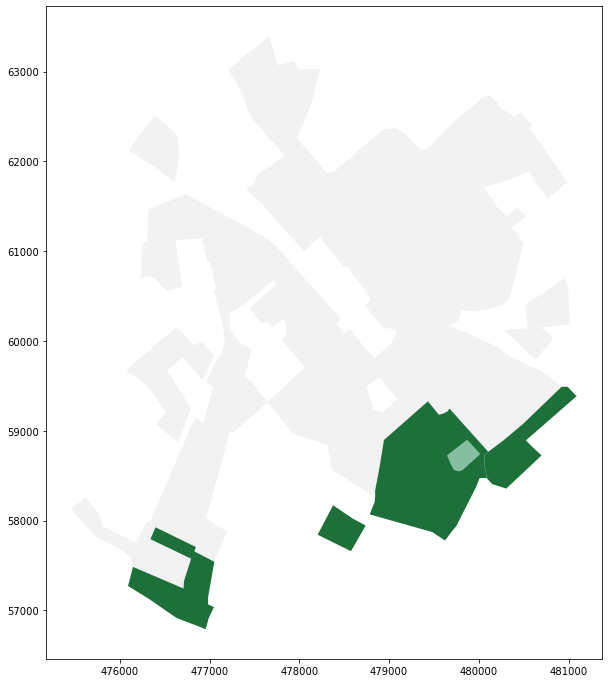

In [115]:
#plot parks (no buffers) in HOLC A 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holca_parks_hood_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holca.plot(ax=ax, color ='#1d703a', zorder=0);


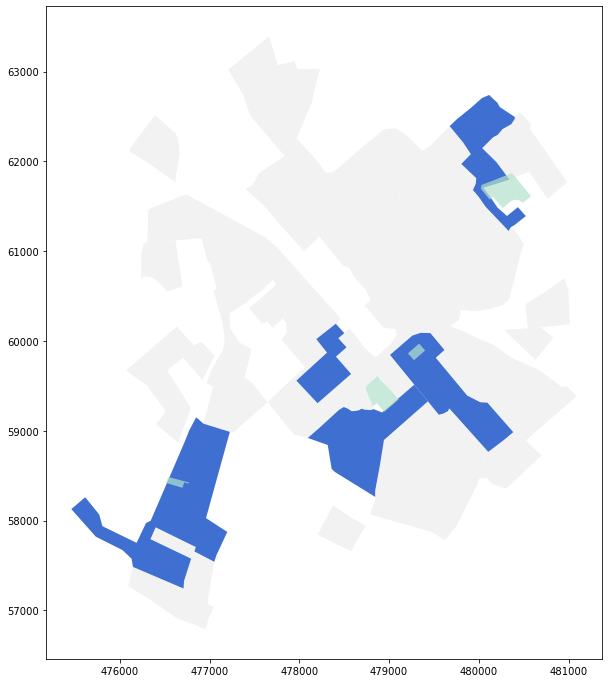

In [116]:
#plot parks (no buffers) in HOLC B 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holcb_parks_hood_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcb.plot(ax=ax, color ='#3f6fd0', zorder=0);

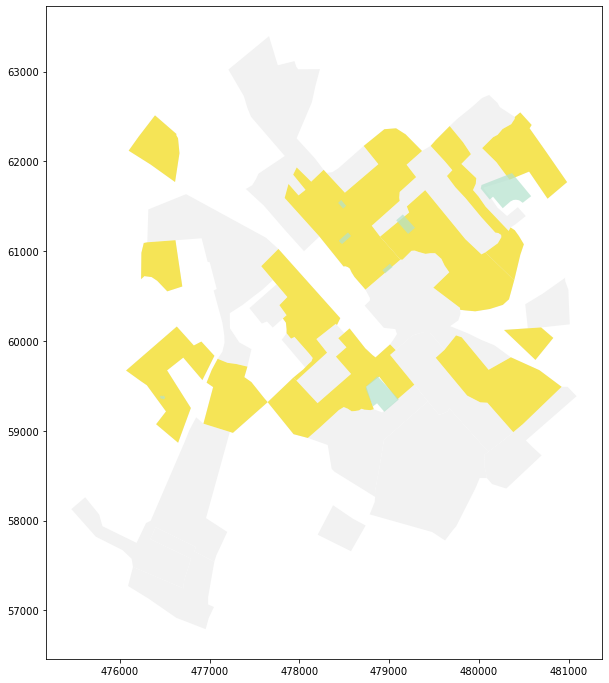

In [117]:
#plot parks (no buffers) in HOLC C 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holcc_parks_hood_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcc.plot(ax=ax, color ='#f5e456', zorder=0);

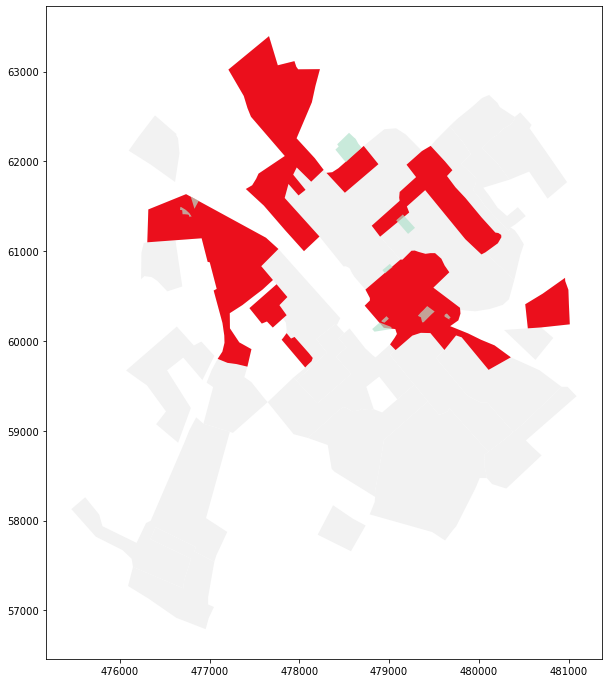

In [118]:
#plot parks (no buffers) in HOLC D 
fig, ax = plt.subplots()

#plot gray outline of neighborhood in the event a holc layer does not display
lex_redlined_geo.plot(ax=ax, color='#f2f2f2', zorder=0);


holcd_parks_hood_int.plot(ax=ax, color='#b3e2cd', zorder=1, alpha=0.7);
holcd.plot(ax=ax, color ='#eb0f1c', zorder=0);

To Pursue at a later date:
Multi Plot figures...is it possible to plot all four plots immediately above on the same figure? Or will it not work since using multiple layers...? Further inspiration can be found here  https://newmapsplus.github.io/map719-lexington-redlining/ 